In [1]:
import random
import string
import abc
import sys
from datetime import datetime
from models import *
from functions import *


d:\AQUI\banking-system-emulator\flask-app\app


In [2]:
rand_str = lambda l : rand_str(l-1)+random.choice(string.ascii_lowercase) if l > 1 else random.choice(string.ascii_lowercase)
rand_str(10)

&#39;qbicwtgfse&#39;

In [3]:
import pandas as pd

In [4]:
PRODUCTS = (SavingAccount,FixedTermDeposit,Loan,CreditCard)

### FUNCIONES

In [5]:
prueba = lambda s: s if (len(df_transactions[df_transactions['id']==s])) == 0 else prueba(random.choice(range(100000,999999)))

In [6]:

def generate_product_ids():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000000,9999999)))
  product_ids.append(id)
  return id   


In [7]:

def generate_credit_card_number():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))+ str(random.choice(range(1000,9999)))
  product_ids.append(id)
  return id   


In [8]:

def generate_transaction_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(100000,9999999)))
  transaction_ids.append(id)
  return id   


In [9]:

def generate_client_id():
  id = ''
  while (id in ids or id == ''):
    id = str(random.choice(range(1,11)))+"-"+ str(random.choice(range(100,999)))+"-"+ str(random.choice(range(1,999)))
  ids.append(id)
  return id   


In [10]:
def generate_saving_accounts(n):
  accs = []
  for i in range(n):
    accs.append(SavingAccount(
        id = generate_product_ids()
    ))
  return accs

In [11]:
def generate_clients(n):
  clients = []
  for i in range(n):
    clients.append(Client(
        id = generate_client_id(),
        name = rand_str(10) +" "+rand_str(15),
        products = []
    ))
  return clients


In [12]:
def generate_balance():
  n = random.choice(range(0,500000))
  cash= ("${:5.2f}".format(n))
  return cash

## Generar Entidades

In [13]:
%%time
ids = []
product_ids = []
clientes = generate_clients(1000)
products = []

# POR CADA PRODUCTO GENERADO...
for cliente in clientes:
  # SELECCIONO UNA CANTIDAD DE PRODUCTOS ALEATORIAMENTE
  cantidad_productos = random.choice(range(1,5))
  
  # POR LA CANTIDAD DE PRODUCTOS SELECCIONADOS...
  for p in range(0,cantidad_productos):    

    # SELECCIONO ALEATORIAMENTE UN TIPO DE PRODUCTO
    tipo_producto = PRODUCTS[random.choice(range(0,len(PRODUCTS)))]

    month = random.choice(range(1,13))
    # SI EL MES ES FEBRERO... ENTRE 1 Y 28
    if month == 2: day = random.choice(range(1,29))
    # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
    elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
    # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
    else: day = random.choice(range(1,30))

    # INSTANCIO EL PRODUCTO
    if tipo_producto is Loan:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(3,17)),
          owner = cliente.id,
          base= random.choice([365,360]),
          length = random.choice(range(1,120)),
          From = datetime(random.choice(range(2018,2020+1)),month ,day))
    elif tipo_producto is CreditCard:
      producto = tipo_producto(
          id=generate_credit_card_number(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
    else:
      producto = tipo_producto(
          id=generate_product_ids(),
          interest_rate=random.choice(range(1,3)),
          owner = cliente.id
          )
 
    # RELACIONO EL PRODUCTO CON EL CLIENTE ACTUAL
    cliente.products.append(producto)
    products.append(producto)
print(type (tipo_producto.balance))

print("Productos generados:",len(products))
print("Clientes generados:",len(clientes))

&lt;class &#39;property&#39;&gt;
Productos generados: 2564
Clientes generados: 1000
Wall time: 407 ms


In [14]:
products[0].owner

&#39;8-637-748&#39;

## Generar transacciones

In [15]:
%%time
MIN_TRX = 10
MAX_TRX = 100
transactions = []
transaction_ids = []



for cliente in clientes:
  for producto in cliente.products:
    
    if type(producto) is SavingAccount or type(producto) is FixedTermDeposit :
      # SELECCIONAR UN NUMERO ALEATORIO DE TRANSACCIONES PARA CADA PRODUCTO
      n_Trx = random.choice(range(MIN_TRX,MAX_TRX))

      for trx in range(n_Trx):
        month = random.choice(range(1,13))
        # SI EL MES ES FEBRERO... ENTRE 1 Y 28
        if month == 2: day = random.choice(range(1,29))
        # SI EL MES ES PAR EN EL SEGUNDO SEMESTRE O ES IMPAR EN EL PRIMER SEMESTRE... ENTRE 1 Y 31
        elif (month % 2 == 0 and month >= 8) or (month % 2 != 0 and month < 8): day = random.choice(range(1,32))
        # DE CUALQUIER OTRA FORMA... ENTRE 1 Y 30
        else: day = random.choice(range(1,30))
        amt = float(str(random.choice(range(1,999999999)))+"."+str(random.choice(range(1,99))))
        nature = "Dr" if random.choice(range(10))==0 else "Cr"
        mvt = amt*-1 if nature == 'Dr' else amt
        transactions.append(Transaction(
            id = generate_transaction_id(),
            product = producto.id,
            nature = nature,
            date = datetime(random.choice(range(2010,2020+1)),month ,day),
            amt = amt,
            mvt = mvt
        ))

print("Transacciones generadas:",len(transactions))
print("Media de transacción por cliente:",len(transactions)/len(products))

Transacciones generadas: 68494
Media de transacción por cliente: 26.713728549141965
Wall time: 5.29 s


## Generar tablas

In [16]:
df_loans =[]
df_deposits = []
df_CreditCards = []
for p in products:
  if type(p) is Loan:
    df_loans.append(p)
  if type(p) is FixedTermDeposit or type(p) is SavingAccount:
    df_deposits.append(p)
  if type(p) is CreditCard:
    df_CreditCards.append(p)



In [17]:
df_CreditCards = pd.DataFrame.from_records([j.to_dict() for j in df_CreditCards])
df_CreditCards.head(3)

,id,interest_rate,balance,owner,type
0,4230118354281617,2,0.0,8-637-748,CreditCard
1,2113392813631996,2,0.0,7-768-538,CreditCard
2,2574717028923708,1,0.0,7-768-538,CreditCard


In [18]:
df_clients = pd.DataFrame.from_records([l.to_dict() for l in clientes])
df_clients.head(3)

,id,client_name
0,8-637-748,prwnjqryip akqlomtarswvhip
1,7-768-538,lirocdespt seczamceftdyhsf
2,4-788-348,igdxlffkid jcjalbulgidgzhu


In [19]:
df_loans = pd.DataFrame.from_records([l.to_dict() for l in df_loans])
df_loans.head(3)

,id,interest_rate,balance,owner,type,length,base,From
0,1829404,9,0.0,8-637-748,Loan,20,360,2018-07-17
1,3008698,12,0.0,7-768-538,Loan,32,365,2018-07-05
2,5258669,15,0.0,3-962-742,Loan,98,360,2018-02-15


In [20]:
df_deposits = pd.DataFrame.from_records([d.to_dict() for d in df_deposits])
df_deposits.head(3)

,id,interest_rate,balance,owner,type
0,4795955,1,0.0,8-637-748,SavingAccount
1,3227359,2,0.0,4-788-348,FixedTermDeposit
2,9454846,2,0.0,4-788-348,SavingAccount


In [21]:
df_transactions = pd.read_csv("db/transactions.csv")
df_transactions = pd.DataFrame.from_records([t.to_dict() for t in transactions])
df_transactions = df_transactions.drop(['level_0'], axis=1)


KeyError: &quot;[&#39;level_0&#39;] not found in axis&quot;

In [22]:
df_deposits = pd.read_csv("db/deposits.csv")
b1 = df_deposits[df_deposits['id']== 1000389]
b1

,Unnamed: 0,id,interest_rate,balance,owner,type
12,12,1000389,1,1.499034e+10,5-149-740,FixedTermDeposit


In [23]:

Transfer.Execute(to=1000389, From=1016265, amount= 85)



Executing Bank Transfer
Saldo disponible: 22467091998.72
tipo 1 FixedTermDeposit, tipo2 SavingAccount


In [24]:
#df_transactions[df_transactions['product']=='1022920']
summarize = df_transactions.groupby(['product'])['mvt']
summarize = summarize.sum()
summarize = summarize.reset_index()
#print(summarize['1022920'==summarize['product']])
for i in range(len(summarize)):
  product_id = summarize['product'].iloc[i]
  
  df_deposits.loc[df_deposits['id']==product_id,'balance'] = summarize['mvt']

df_deposits[df_deposits['id'].isin(summarize['product'])]
#print(df_deposits[summarize['product']==df_deposits['id']])

ValueError: Must have equal len keys and value when setting with an iterable

## Requerimientos


***vas a definir la funcion de ejecutar transferencia***



***tienes que buscar la informacion de las cuentas afectadas en la tabla de productos***


***vas a ver si la cuenta a acreditar tiene saldo***


vas a generar la transaccion en la tabla de transacciones


vas a modificar el balance de las cuentas afectadas en la tabla de productos



### Generar estado de cuenta

In [24]:
def getAccountStatement(**kwargs):
  
  try: kwargs['product']
  except: print("A product id is required")

  
  print("Getting account statement for product",kwargs['product'])
  df = df_transactions[df_transactions['product'] == kwargs['product']]
  
  try: start = kwargs['start'] 
  except: start = df['accounting_date'].min()
  try: end = kwargs['end']
  except: end = df['accounting_date'].max()
  
  df = df[(df.accounting_date >= start) & (df.accounting_date <= end) ]

  print("Found",len(df),"transactions from",start,"to",end)
  df = df.sort_values(by=['accounting_date'])
  df = df.reset_index()
  df = df.drop(['index'],axis=1)
  return df

In [25]:
%%time
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
print(account_stmnt)


Getting account statement for product 1673762
Found 33 transactions from 2010-11-28 00:00:00 to 2020-10-25 00:00:00
         id nature accounting_date        amount  product           mvt
0   9603121     Cr      2010-11-28  8.663546e+08  1673762  8.663546e+08
1   9579835     Dr      2011-01-13  7.219743e+08  1673762 -7.219743e+08
2   1158870     Cr      2011-02-16  7.713481e+08  1673762  7.713481e+08
3   2891826     Cr      2012-04-26  3.453051e+08  1673762  3.453051e+08
4   9502157     Cr      2013-01-10  8.598503e+08  1673762  8.598503e+08
5   7679653     Cr      2013-05-04  8.790650e+08  1673762  8.790650e+08
6   2758035     Cr      2013-09-11  4.568216e+08  1673762  4.568216e+08
7   2453473     Cr      2014-01-27  8.801826e+07  1673762  8.801826e+07
8   7493526     Dr      2014-12-31  8.803388e+08  1673762 -8.803388e+08
9   1230152     Cr      2015-03-01  4.460076e+08  1673762  4.460076e+08
10  5898633     Cr      2016-02-12  5.740796e+07  1673762  5.740796e+07
11  5978883     Cr  

#### Mostrar un gráfico con el movimiento de su producto

In [26]:
import matplotlib.pyplot as plt

In [27]:
# generar el campo valor
account_stmnt['mvt'] = 0.00
account_stmnt.loc[account_stmnt['nature']=="Dr",'mvt'] = account_stmnt['amount']
account_stmnt.loc[account_stmnt['nature']=="Cr",'mvt'] = account_stmnt['amount']*-1
account_stmnt.sum()

id         9603121957983511588702891826950215776796532758...
nature     CrDrCrCrCrCrCrCrDrCrCrCrCrCrCrCrCrCrCrCrCrCrCr...
amount                                           1.80018e+10
product    1673762167376216737621673762167376216737621673...
mvt                                             -1.36951e+10
dtype: object

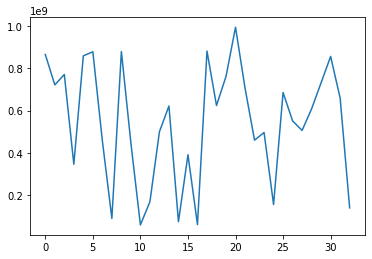

In [28]:
plt.plot(account_stmnt.amount)
plt.show()

### Ejecutar Transferencia

In [29]:
account_stmnt = getAccountStatement(product=df_transactions.iloc[0]['product'])
account_stmnt

Getting account statement for product 1673762
Found 33 transactions from 2010-11-28 00:00:00 to 2020-10-25 00:00:00


,id,nature,accounting_date,amount,product,mvt
0,9603121,Cr,2010-11-28,8.663546e+08,1673762,8.663546e+08
1,9579835,Dr,2011-01-13,7.219743e+08,1673762,-7.219743e+08
2,1158870,Cr,2011-02-16,7.713481e+08,1673762,7.713481e+08
3,2891826,Cr,2012-04-26,3.453051e+08,1673762,3.453051e+08
4,9502157,Cr,2013-01-10,8.598503e+08,1673762,8.598503e+08
5,7679653,Cr,2013-05-04,8.790650e+08,1673762,8.790650e+08
6,2758035,Cr,2013-09-11,4.568216e+08,1673762,4.568216e+08
7,2453473,Cr,2014-01-27,8.801826e+07,1673762,8.801826e+07
8,7493526,Dr,2014-12-31,8.803388e+08,1673762,-8.803388e+08
9,1230152,Cr,2015-03-01,4.460076e+08,1673762,4.460076e+08


### Generar tablas

In [30]:
df_deposits.to_csv("db/deposits.csv")
df_loans.to_csv("db/loans.csv")
df_transactions.to_csv("db/transactions.csv")
df_clients.to_csv("db/clients.csv")
df_CreditCards.to_csv("db/CreditCards.csv")

## Pruebas

In [31]:
deposits = pd.read_csv("db/deposits.csv")
loans = pd.read_csv("db/loans.csv")

dep2 = deposits[deposits.owner == '6-832-434']
loans2 = loans[loans.owner == '6-832-434']
print(dep2)
client_products = []
for i in range(len(dep2)):
    #print(dep2.iloc[i].type)
    if eval(dep2.iloc[i].type) == SavingAccount:
        client_products.append(SavingAccount(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
    if eval(dep2.iloc[i].type) == FixedTermDeposit:
        client_products.append(FixedTermDeposit(
            id = str(dep2.iloc[i].id),
            interest_rate = dep2.iloc[i].interest_rate,
            balance = float(dep2.iloc[i].balance),
            owner = dep2.iloc[i].owner
        ))
for i in range(len(loans2)):

    client_products.append(Loan(
            id = str(loans2.iloc[i].id),
            interest_rate = loans2.iloc[i].interest_rate,
            balance = float(loans2.iloc[i].balance),
            owner = loans2.iloc[i].owner,
            length = loans2.iloc[i].length,
            base = loans2.iloc[i].base
        ))


Empty DataFrame
Columns: [Unnamed: 0, id, interest_rate, balance, owner, type]
Index: []


In [32]:
p = Client.getClientProducts(client='4-523-333')
p

[]

In [33]:
import pandas as pd
from models import Product
pd.options.display.float_format = '${:,.2f}'.format
print(os.getcwd())
deposits = pd.read_csv("db/deposits.csv")

d:\AQUI\banking-system-emulator\flask-app\app


In [34]:
Client.getClientProducts(client='8-481-903')

[]

In [35]:
Product.getProductBalance(id=7721659)

UnboundLocalError: local variable &#39;balance&#39; referenced before assignment

In [ ]:
'{:.2f}'.format(14669322166.459997)

In [ ]:
l = Loan(length = 12,base=365,balance=500,id='12123',interest_rate=3,owner="")
l.generate_amortization_table()

In [ ]:
l.to_dict()